In [6]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [8]:
# Add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [9]:
coordinates

[(34.97750710798341, 34.82217009899719),
 (-59.54235358853647, -75.09131756608012),
 (-81.99697608919556, -69.28745137738723),
 (-11.081619057639344, -58.78788252812598),
 (49.28867084249862, 56.03095529505251),
 (-41.142489317885875, 9.58331021247514),
 (-22.310442739838052, 68.53621730033842),
 (-21.65839652343672, -66.43134448966707),
 (61.52784957060595, -84.80044391910634),
 (54.27045558350082, 137.0637149009969),
 (87.92109795869561, -74.91995476505818),
 (60.61662103308163, -133.28528699489564),
 (-72.2486556542162, 69.84582449184074),
 (-40.97886611669431, -71.30789578267068),
 (65.32922519222129, 15.908053884262301),
 (-56.182792859754926, -32.491110830809646),
 (11.586172565722137, -21.93008476189621),
 (-55.62112503466771, -160.25843464344138),
 (-54.11748663076748, 84.44408075511103),
 (31.811392804890062, 132.55135839455005),
 (83.73727961178605, 60.763227758257216),
 (86.79986326426479, 27.872409176887288),
 (68.07103077794523, 78.05956193054334),
 (-2.850913823477697, -9

In [10]:
from citipy import citipy

In [11]:
#Create a list for holding cities
cities = []
# Identify the nearst city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm suficcient count
len(cities)

614

In [12]:
cities

['dipkarpaz',
 'punta arenas',
 'ushuaia',
 'vilhena',
 'shubarkuduk',
 'cape town',
 'grand river south east',
 'tupiza',
 'attawapiskat',
 'chumikan',
 'qaanaaq',
 'whitehorse',
 'taolanaro',
 'san carlos de bariloche',
 'storforshei',
 'chuy',
 'praia',
 'mataura',
 'busselton',
 'shintomi',
 'amderma',
 'longyearbyen',
 'tazovskiy',
 'puerto ayora',
 'mount gambier',
 'dikson',
 'lavrentiya',
 'lompoc',
 'kidal',
 'avenal',
 'manavalakurichi',
 'leningradskiy',
 'klaksvik',
 'norman wells',
 'vardo',
 'bengkulu',
 'naze',
 'thompson',
 'aflu',
 'el badari',
 'huarmey',
 'caldas novas',
 'los llanos de aridane',
 'rikitea',
 'albany',
 'oranjemund',
 'katherine',
 'bluff',
 'hobart',
 'opuwo',
 'matamoros',
 'saldanha',
 'iquique',
 'manjacaze',
 'vila franca do campo',
 'kaitangata',
 'gambela',
 'barrow',
 'arraial do cabo',
 'svetlyy',
 'upernavik',
 'zyryanka',
 'esperance',
 'vaitupu',
 'hasaki',
 'carnarvon',
 'ostrovnoy',
 'khatanga',
 'ayan',
 'halalo',
 'genhe',
 'bredasdor

In [13]:
# Import requestes
import requests
# Import the API Key
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid='+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7d880ac315645e0386736d5ad7db6a46


In [15]:
#Import the datetime module from the datetime library
from datetime import datetime

In [16]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ','+')
    
#Log the URL, record and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
# #Add one to the record_count
    record_count += 1
# #Run an API reqeust for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

            #Parse ou the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
            #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
            #Append the city information into city_data list
        city_data.append({'City': city.title(),
                              'Lat': city_lat,
                              'Lng': city_lng,
                              'Max Temp': city_max_temp,
                              'Humidity': city_humidity,
                              'Cloudiness': city_clouds,
                              'Wind Speed': city_wind,
                              'Country': city_country,
                              'Date': city_date})
# If an error is experienced, skip the city
    except:
        print('City not found.Skipping...')
        pass

#Indicate that Data Loading is complete
print('---------------------------')
print('Data Retrieval Complete    ')
print('---------------------------')
        
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dipkarpaz
City not found.Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | vilhena
Processing Record 5 of Set 1 | shubarkuduk
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | grand river south east
City not found.Skipping...
Processing Record 8 of Set 1 | tupiza
Processing Record 9 of Set 1 | attawapiskat
City not found.Skipping...
Processing Record 10 of Set 1 | chumikan
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | taolanaro
City not found.Skipping...
Processing Record 14 of Set 1 | san carlos de bariloche
Processing Record 15 of Set 1 | storforshei
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | praia
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Se

Processing Record 38 of Set 4 | taltal
Processing Record 39 of Set 4 | hilo
Processing Record 40 of Set 4 | sedelnikovo
City not found.Skipping...
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | illoqqortoormiut
City not found.Skipping...
Processing Record 43 of Set 4 | kanigiri
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | steinheim
Processing Record 46 of Set 4 | popondetta
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | ciudad del maiz
Processing Record 50 of Set 4 | caravelas
Processing Record 1 of Set 5 | santa rosa
Processing Record 2 of Set 5 | awjilah
Processing Record 3 of Set 5 | denpasar
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | sinnamary
Processing Record 6 of Set 5 | kagoro
Processing Record 7 of Set 5 | torbay
Processing Record 8 of Set 5 | bac lieu
Processing Record 9 of Set 5 | buraydah
Processing Record 10 of Set 5 | ituni

Processing Record 30 of Set 8 | xining
Processing Record 31 of Set 8 | kupang
Processing Record 32 of Set 8 | maghar
Processing Record 33 of Set 8 | dickinson
Processing Record 34 of Set 8 | grand gaube
Processing Record 35 of Set 8 | burla
Processing Record 36 of Set 8 | biak
Processing Record 37 of Set 8 | santa fe
Processing Record 38 of Set 8 | robe
Processing Record 39 of Set 8 | plettenberg bay
Processing Record 40 of Set 8 | verkhoyansk
Processing Record 41 of Set 8 | urdoma
Processing Record 42 of Set 8 | coihaique
Processing Record 43 of Set 8 | maragogi
Processing Record 44 of Set 8 | ahipara
Processing Record 45 of Set 8 | udachnyy
Processing Record 46 of Set 8 | vila velha
Processing Record 47 of Set 8 | aykhal
Processing Record 48 of Set 8 | kemin
Processing Record 49 of Set 8 | dombas
Processing Record 50 of Set 8 | lashio
Processing Record 1 of Set 9 | yinchuan
Processing Record 2 of Set 9 | sao jose da coroa grande
Processing Record 3 of Set 9 | salvador
Processing Reco

Processing Record 20 of Set 12 | esmeralda
Processing Record 21 of Set 12 | comodoro rivadavia
Processing Record 22 of Set 12 | saurimo
Processing Record 23 of Set 12 | goderich
Processing Record 24 of Set 12 | sinjah
City not found.Skipping...
Processing Record 25 of Set 12 | changde
Processing Record 26 of Set 12 | west wendover
Processing Record 27 of Set 12 | vilyuysk
Processing Record 28 of Set 12 | novikovo
Processing Record 29 of Set 12 | teguise
Processing Record 30 of Set 12 | barra patuca
Processing Record 31 of Set 12 | chernoyerkovskaya
Processing Record 32 of Set 12 | apostolove
Processing Record 33 of Set 12 | vizinga
Processing Record 34 of Set 12 | upington
Processing Record 35 of Set 12 | gigmoto
Processing Record 36 of Set 12 | lilongwe
Processing Record 37 of Set 12 | lerdo
Processing Record 38 of Set 12 | nabire
Processing Record 39 of Set 12 | ancud
Processing Record 40 of Set 12 | swellendam
Processing Record 41 of Set 12 | victoria point
Processing Record 42 of S

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,53.60,54,75,29.97,CL,2020-11-26 15:52:33
1,Ushuaia,-54.80,-68.30,46.40,65,75,20.80,AR,2020-11-26 15:52:34
2,Vilhena,-12.74,-60.15,84.20,62,75,11.41,BR,2020-11-26 15:52:34
3,Shubarkuduk,49.14,56.49,27.63,99,100,6.89,KZ,2020-11-26 15:52:34
4,Cape Town,-33.93,18.42,66.20,59,20,26.40,ZA,2020-11-26 15:49:02
...,...,...,...,...,...,...,...,...,...
564,Tombouctou,20.00,-3.00,78.93,16,72,5.41,ML,2020-11-26 15:53:44
565,Hokitika,-42.72,170.97,53.22,88,94,2.39,NZ,2020-11-26 15:53:44
566,Novyy Urengoy,66.08,76.63,11.97,96,100,8.21,RU,2020-11-26 15:50:52
567,Sivaki,52.63,126.75,7.99,88,0,12.30,RU,2020-11-26 15:53:44


In [18]:
# Rearrange columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-11-26 15:52:33,-53.15,-70.92,53.60,54,75,29.97
1,Ushuaia,AR,2020-11-26 15:52:34,-54.80,-68.30,46.40,65,75,20.80
2,Vilhena,BR,2020-11-26 15:52:34,-12.74,-60.15,84.20,62,75,11.41
3,Shubarkuduk,KZ,2020-11-26 15:52:34,49.14,56.49,27.63,99,100,6.89
4,Cape Town,ZA,2020-11-26 15:49:02,-33.93,18.42,66.20,59,20,26.40
...,...,...,...,...,...,...,...,...,...
564,Tombouctou,ML,2020-11-26 15:53:44,20.00,-3.00,78.93,16,72,5.41
565,Hokitika,NZ,2020-11-26 15:53:44,-42.72,170.97,53.22,88,94,2.39
566,Novyy Urengoy,RU,2020-11-26 15:50:52,66.08,76.63,11.97,96,100,8.21
567,Sivaki,RU,2020-11-26 15:53:44,52.63,126.75,7.99,88,0,12.30


In [19]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data inta a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant field from the DataFram for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

<function matplotlib.pyplot.show(close=None, block=None)>

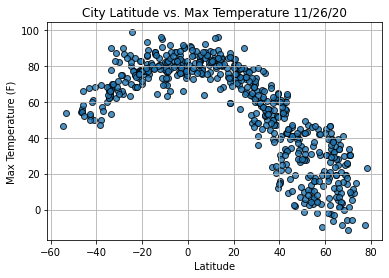

In [21]:
# Import time module
import time

#Build the scatter plot for latitude vs msx tempertaur
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

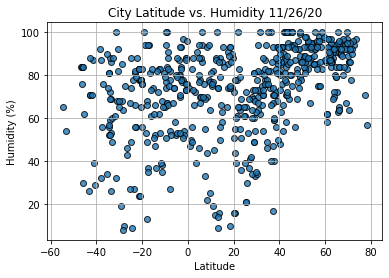

In [22]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

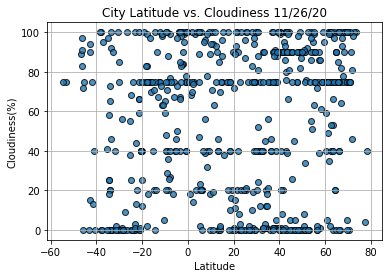

In [23]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

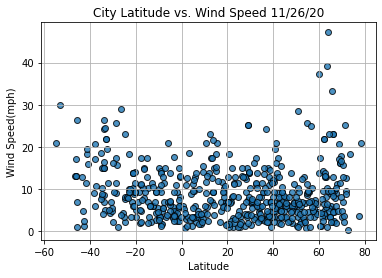

In [24]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show

In [25]:
# Import linregress
from scipy.stats import linregress

In [26]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    #Calculate teh regression line 'y_values' from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,'r')
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitutde')
    plt.ylabel('y_label')
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2020-11-26 15:52:35
Lat                        -46.19
Lng                        168.86
Max Temp                       54
Humidity                       84
Cloudiness                     97
Wind Speed                     13
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df['Lat'] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Shubarkuduk,KZ,2020-11-26 15:52:34,49.14,56.49,27.63,99,100,6.89
6,Chumikan,RU,2020-11-26 15:52:34,54.72,135.31,3.13,85,95,25.57
7,Qaanaaq,GL,2020-11-26 15:52:34,77.48,-69.36,-8.43,71,4,3.62
8,Whitehorse,CA,2020-11-26 15:52:02,60.72,-135.05,30.20,58,5,17.22
10,Storforshei,NO,2020-11-26 15:52:35,66.40,14.52,36.00,90,75,2.24
...,...,...,...,...,...,...,...,...,...
563,Nyaunglebin,MM,2020-11-26 15:53:44,17.95,96.73,73.33,89,0,5.75
564,Tombouctou,ML,2020-11-26 15:53:44,20.00,-3.00,78.93,16,72,5.41
566,Novyy Urengoy,RU,2020-11-26 15:50:52,66.08,76.63,11.97,96,100,8.21
567,Sivaki,RU,2020-11-26 15:53:44,52.63,126.75,7.99,88,0,12.30


In [35]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]